In [8]:
%%html
<img src="https://cf-assets1.tenlong.com.tw/images/112640/original/9789864761982.jpg" style="height:350px; vertical-align: middle;">

In [1]:
import pandas
salary = pandas.read_csv('datas/STOCK_DAY.csv', index_col = 0)
salary.head()

,total,money,open,high,low,close,range,number,Unnamed: 9
date,,,,,,,,,
107/05/02,87000,"9,600,500",111.0,112.0,109.5,109.5,-0.5,86,NaN
107/05/03,112002,"12,204,220",109.0,110.5,108.0,108.5,-1.0,109,NaN
107/05/04,102000,"11,228,500",109.0,111.5,108.0,110.0,1.5,88,NaN
107/05/07,281135,"31,981,200",113.0,115.5,111.0,115.0,5.0,257,NaN
107/05/08,275050,"31,810,425",115.0,116.5,115.0,116.0,1.0,212,NaN


In [2]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 107/05/02 to 107/04/30
Data columns (total 9 columns):
total         25 non-null int64
money         25 non-null object
open          25 non-null float64
high          25 non-null float64
low           25 non-null float64
close         25 non-null float64
range         25 non-null float64
number        25 non-null int64
Unnamed: 9    0 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.6+ KB


Populating the interactive namespace from numpy and matplotlib


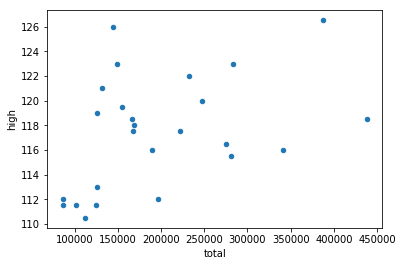

In [10]:
%pylab inline
salary.plot(kind='scatter', x = 'total', y= 'high')

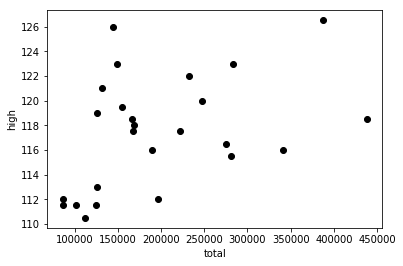

In [14]:
from matplotlib import pyplot as plt
X = salary[['total']]
Y = salary['high']

plt.scatter(X['total'],Y,color='black')
plt.xlabel('total')
plt.ylabel('high')
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
import numpy 
regr=LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
regr.coef_

array([  2.03582924e-05])

In [17]:
regr.intercept_

113.41856623512258

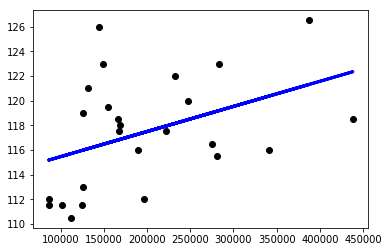

In [18]:
plt.scatter(X['total'],Y,color='black' )
Y_ = regr.predict(X)
plt.plot(X['total'],Y_,color='blue',linewidth=3)
plt.show()

In [8]:
pandas.get_dummies(salary['range']).head()

,-5.5,-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,0.0,1.0,1.5,2.0,4.0,4.5,5.0
date,,,,,,,,,,,,,,,
107/05/02,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
107/05/03,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
107/05/04,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
107/05/07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
107/05/08,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [12]:
stock = pandas.concat([salary,pandas.get_dummies(salary['high']), pandas.get_dummies(salary['low'])], axis  = 1)

In [14]:
stock.columns

Index([     'total',      'money',       'open',       'high',        'low',
            'close',      'range',     'number', 'Unnamed: 9',        110.5,
              111.5,        112.0,        113.0,        115.5,        116.0,
              116.5,        117.5,        118.0,        118.5,        119.0,
              119.5,        120.0,        121.0,        122.0,        123.0,
              126.0,        126.5,        108.0,        108.5,        109.0,
              109.5,        110.0,        111.0,        113.5,        114.5,
              115.0,        115.5,        116.0,        117.0,        117.5,
              118.0,        121.5,        123.0],
      dtype='object')

In [25]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
X = stock[['total', 'open', 'high', 'close', 'range','number']]
y = stock['close'].values

In [26]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

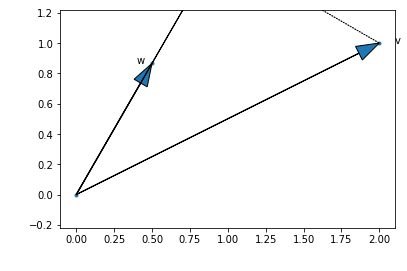

In [10]:
from __future__ import division
from collections import Counter, defaultdict
from sample.linear_algebra import vector_subtract
from sample.statistics import mean, correlation, standard_deviation, de_mean
from sample.gradient_descent import minimize_stochastic
import math, random

In [11]:
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

def error(alpha, beta, x_i, y_i):
    return y_i - predict(alpha, beta, x_i)

def sum_of_squared_errors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

def least_squares_fit(x,y):
    """given training values for x and y,
    find the least-squares values of alpha and beta"""
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

def total_sum_of_squares(y):
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))

def r_squared(alpha, beta, x, y):
    """the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model"""
    
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

def squared_error(x_i, y_i, theta):
    alpha, beta = theta
    return error(alpha, beta, x_i, y_i) ** 2

def squared_error_gradient(x_i, y_i, theta):
    alpha, beta = theta
    return [-2 * error(alpha, beta, x_i, y_i),       # alpha partial derivative
            -2 * error(alpha, beta, x_i, y_i) * x_i] # beta partial derivative

In [12]:
num_friends_good = [49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes_good = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)

In [13]:
"alpha", alpha

('alpha', 22.94755241346903)

In [14]:
"beta", beta

('beta', 0.903865945605865)

In [15]:
"r-squared", r_squared(alpha, beta, num_friends_good, daily_minutes_good)

('r-squared', 0.3291078377836305)

## gradient descent:

In [16]:
random.seed(0)
theta = [random.random(), random.random()]
alpha, beta = minimize_stochastic(squared_error, 
                                  squared_error_gradient,
                                  num_friends_good,
                                  daily_minutes_good, 
                                  theta,
                                  0.0001)

In [17]:
"alpha", alpha

('alpha', 0.8444218515250481)

In [18]:
"beta", beta

('beta', 0.7579544029403025)

###  SVM影片 https://www.youtube.com/watch?time_continue=42&v=3liCbRZPrZA